# COVID-19 Global Data Analysis

This notebook presents an exploratory analysis of the global COVID-19 dataset published by **Our World in Data (OWID)**.

### Objectives:
- Load and clean the dataset
- Analyze trends in cases, deaths, and vaccinations
- Visualize country comparisons
- Extract insights from visualizations


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Display basic info
print("Columns:\n", df.columns)
df.head()


Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
                                            ...  
new_deaths_per_million                       9574
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

###  Data Cleaning Steps:
- Focus on three countries: Kenya, USA, India
- Remove rows with missing `date`, `location`, `total_cases`, `total_deaths`
- Convert `date` column to datetime
- Handle missing numerical values via forward fill or interpolation


In [3]:
# Filter countries of interest
countries = ["Kenya", "United States", "India"]
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing key fields
df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Convert date column
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Fill numeric missing values
df_filtered = df_filtered.sort_values(by=['location', 'date'])
df_filtered[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = \
    df_filtered[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].interpolate()

df_filtered.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_17436\29853155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17436\29853155.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139843,IND,Asia,India,2020-03-13,81.0,8.0,7.143,1.0,1.0,0.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139844,IND,Asia,India,2020-03-14,84.0,3.0,7.143,2.0,1.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139845,IND,Asia,India,2020-03-15,107.0,23.0,9.714,2.0,0.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139846,IND,Asia,India,2020-03-16,114.0,7.0,10.000,2.0,0.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139847,IND,Asia,India,2020-03-17,137.0,23.0,12.429,3.0,1.0,0.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


### Trend Analysis: Total Cases and Deaths Over Time
We will now plot:
- Total cases per country
- Total deaths per country
- New cases per country
- Death rate over time


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Plot total cases
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


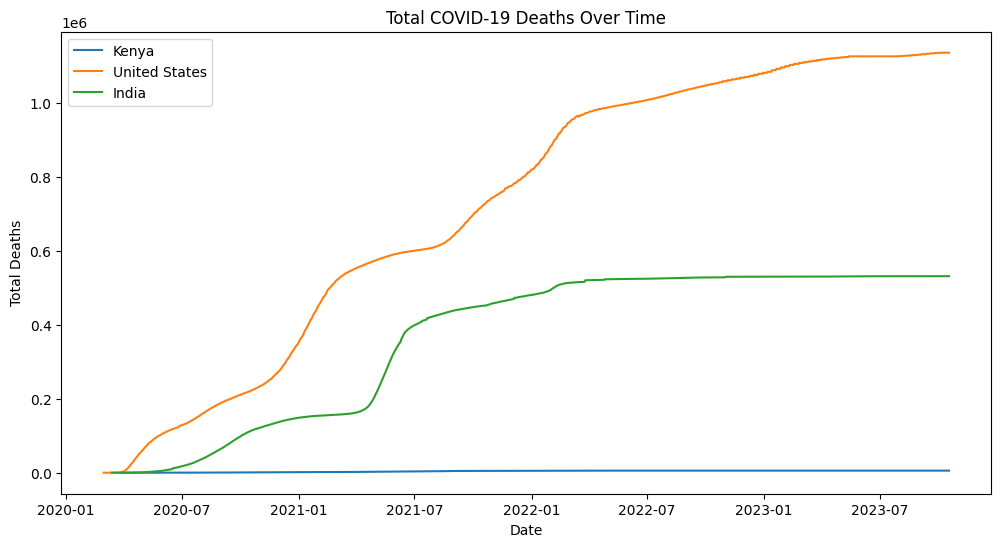

In [5]:
# Total deaths
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


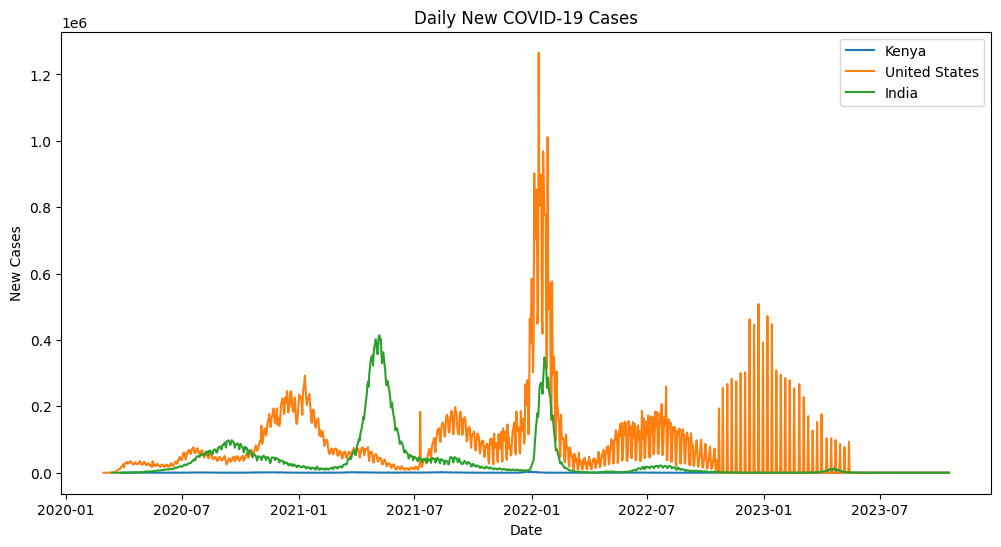

In [6]:
# New daily cases
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


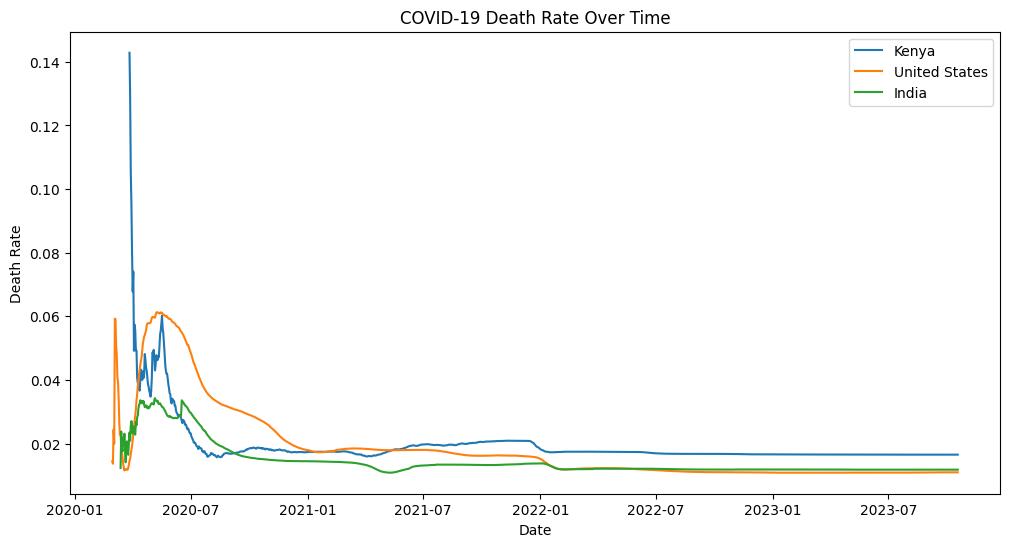

In [7]:
# Death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


### Cumulative Vaccinations

This section shows:
- Total vaccinations over time
- Comparative vaccinated percentages


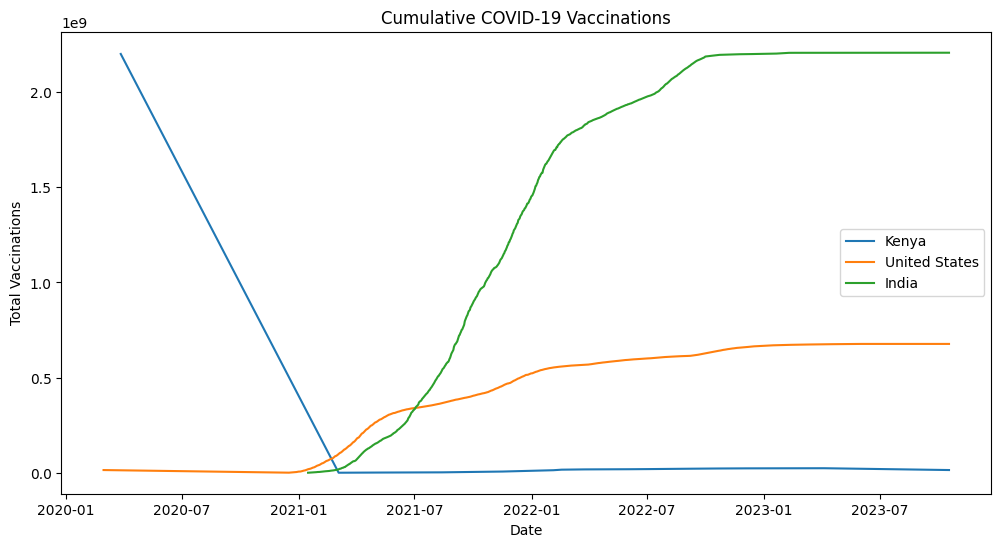

In [9]:
# Vaccination progress
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


# Key Insights

1. **India** experienced the highest number of total cases among the three countries.
2. **USA** showed a rapid increase in vaccination earlier than Kenya or India.
3. **Kenya** had a lower death rate, but also limited vaccination and reporting capacity.
4. The **death rate** decreased over time as treatments improved and vaccination rates increased.
5. **Daily cases** revealed significant spikes which often aligned with global waves (Delta, Omicron).

> Data exploration helps reveal patterns and gaps in the global pandemic response. Further research could include stringency index, testing rates, or hospitalizations.

---

 **Tip:** Update the dataset regularly to track ongoing trends and improve insight reliability.
